In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv('./Crime_Data.csv')

In [3]:
df.head(2)
df.shape # (523591, 11)
# df.info()

(523591, 11)

In [4]:
df['Occurred Date'] = df['Occurred Date'].fillna('None')

In [15]:
years = []
months = []
days = []
for i in range(len(df)):
    value = str(df['Occurred Date'][i])
    if (value != 'None'):
        year = value[6:10]
        month = value[0:2]
        day = value[3:5]
        months.append(month)
        days.append(day)
        years.append(year)         

In [59]:
dfDays = pd.DataFrame([years, months, days],index = ['Year', 'Month', 'Day'])

In [60]:
dfDays = dfDays.T

In [202]:
def plotting(df1, val, xlabel, ylabel, titlelabel):
    dfTest = df1.groupby(val).size()
    dfTest = pd.DataFrame([dfTest], index = [val])
    # TODO: Add in how to make plot bar plot through matplot.
    x = dfTest.T.index.values
    y = dfTest.T[val].values
    
    plt.bar(x, y, color = "g", ) 
  
    # putting labels 
    plt.xlabel(xlabel) 
    plt.ylabel(ylabel) 
    plt.title(titlelabel)
    plt.rcParams['figure.figsize'] = (10,5)
    
    # function to show plot 
    plt.show() 
    
    # hist1 = dfTest.T[val].plot.bar()
    # plot_regression_line(x, y, b, 'Years', 'Reported Crime Count', 'Reported Crimes per years in Seattle')
    return dfTest

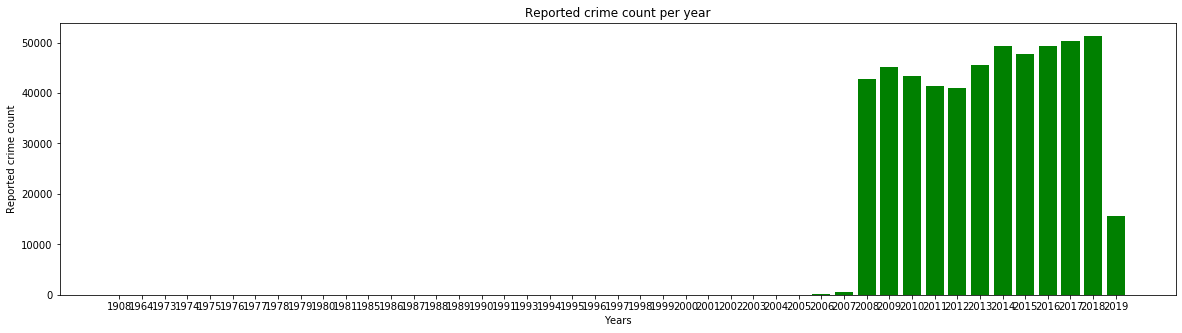

In [198]:
dfYear = plotting(dfDays, 'Year', 'Years', 'Reported crime count', 'Reported crime count per year')

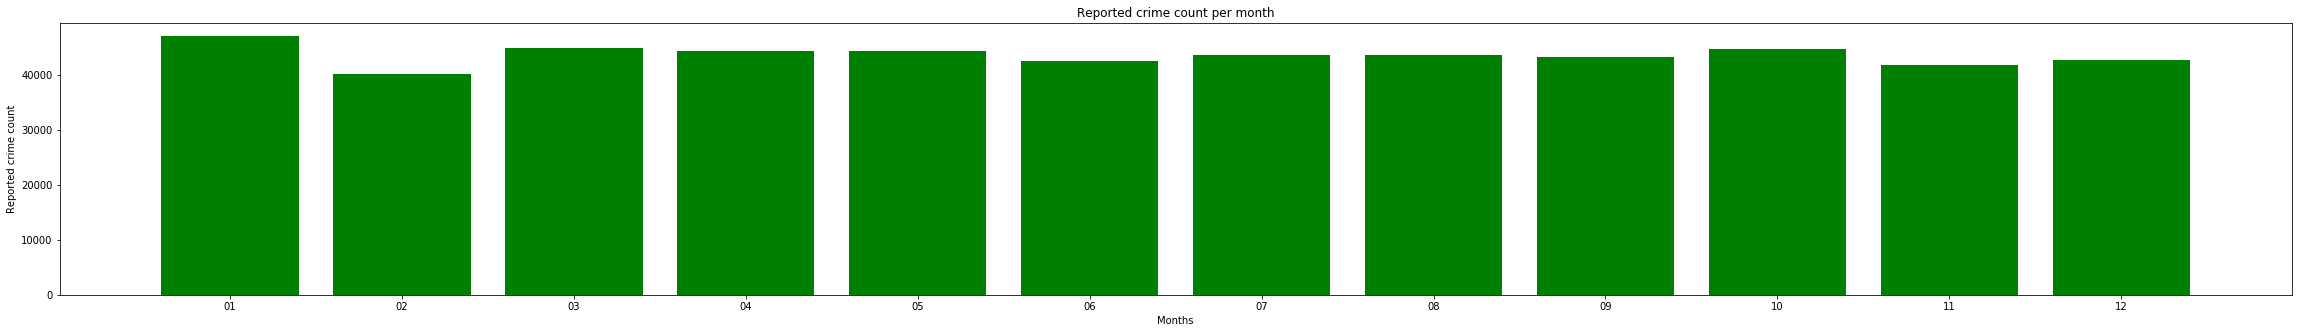

In [203]:
dfMonth = plotting(dfDays, 'Month', 'Months', 'Reported crime count', 'Reported crime count per month')

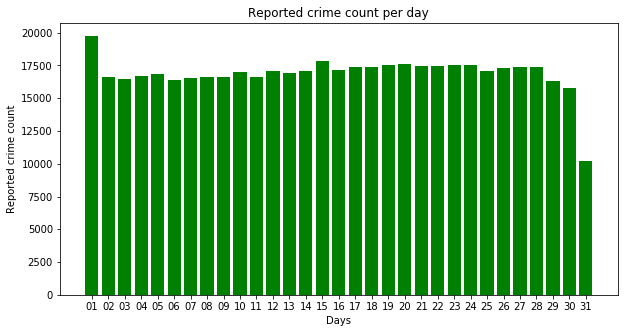

In [204]:
dfDay = plotting(dfDays, 'Day', 'Days', 'Reported crime count', 'Reported crime count per day')

array([19755, 16631, 16473, 16665, 16852, 16384, 16529, 16656, 16590,
       17011, 16601, 17059, 16941, 17055, 17818, 17191, 17373, 17369,
       17570, 17594, 17478, 17437, 17557, 17555, 17116, 17336, 17363,
       17348, 16290, 15806, 10186])

In [114]:
def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 
    # mean of x and y vector 
    m_x = np.mean(x)
    m_y = np.mean(y) 
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
    return(b_0, b_1)

In [125]:
def plot_regression_line(x, y, b, xlabel, ylabel, titlelabel): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
               marker = "o", s = 30) 
  
    # predicted response vector 
    y_pred = b[0] + b[1]*x 
  
    # plotting the regression line 
    plt.plot(x, y_pred, color = "g") 
  
    # putting labels 
    plt.xlabel(xlabel) 
    plt.ylabel(ylabel) 
    plt.title(titlelabel)

    # function to show plot 
    plt.show() 

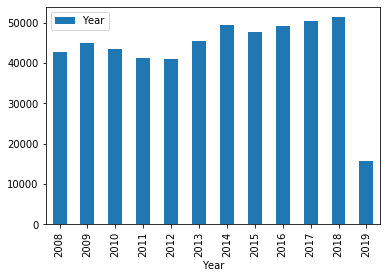

In [139]:
upperYearCount = dfYear.T[dfYear.T['Year'] > 2008]
upperYearCount.plot.bar()

In [128]:
topYears = []
topYearsCrime = []
for i in range(len(upperYearCount) - 1):
    topYears.append(int(upperYearCount['Year'].index[i]) - 2008) 
    topYearsCrime.append(upperYearCount['Year'][i])
x = np.array(topYears)
y = np.array(topYearsCrime)

Estimated coefficients:
b_0 = 41431.590909090904  \ 
b_1 = 930.5727272727273
Equation for expected amount of crime this year is: Crime = Years * 931.0 + 41432.0
The expected amount of crimes in the Seattle area is 51668.0 in 2019 and 52598.0 in 2020


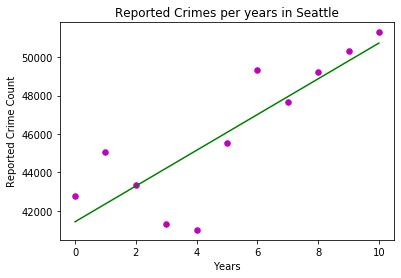

In [140]:
# observations 
x = np.array(topYears).astype(np.float) # Years
y = np.array(topYearsCrime).astype(np.float) # Amount

# estimating coefficients 
b = estimate_coef(x, y) 
print("Estimated coefficients:\nb_0 = {}  \ \nb_1 = {}".format(b[0], b[1])) 
print(f"Equation for expected amount of crime this year is: Crime = Years * {round(b[1])} + {round(b[0])}")
print(f'The expected amount of crimes in the Seattle area is {round(b[1] * 11 + b[0], 0)} in 2019 and {round(b[1] * 12 + b[0], 0)} in 2020')

# plotting regression line 
plot_regression_line(x, y, b, 'Years', 'Reported Crime Count', 'Reported Crimes per years in Seattle')

In [ ]:
# 1. What types of crime happened during different times of the day - finshed
# 2. Difference in time between occurred date vs reported date. - finished
    # What subcategories of crimes had the highest differences in occurred vs reported date 
# 3. Over the years has reported crime went down - finished
# 4. Crime statistics for the city neighbourhoods 
